In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [5]:
data_baseline = xr.open_mfdataset('/Volumes/UnionSine/FCO2/FCO2_Baseline/*.nc')

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
data_oae = xr.open_mfdataset('/Volumes/UnionSine/FCO2/FCO2_OAE/*.nc')

In [7]:
sliced_data_baseline = data_baseline.where((3 < data_baseline.nav_lon) & (data_baseline.nav_lon < 4) & (52 < data_baseline.nav_lat) & (data_baseline.nav_lat < 53), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [8]:
sliced_data_oae = data_oae.where((3 < data_oae.nav_lon) & (data_oae.nav_lon < 4) & (52 < data_oae.nav_lat) & (data_oae.nav_lat < 53), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

### EU Seasonal Average of FCO2 

In [9]:
sliced_data_baseline_plot = sliced_data_baseline.fco2.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.fco2.mean(dim=('y', 'x'))

In [10]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

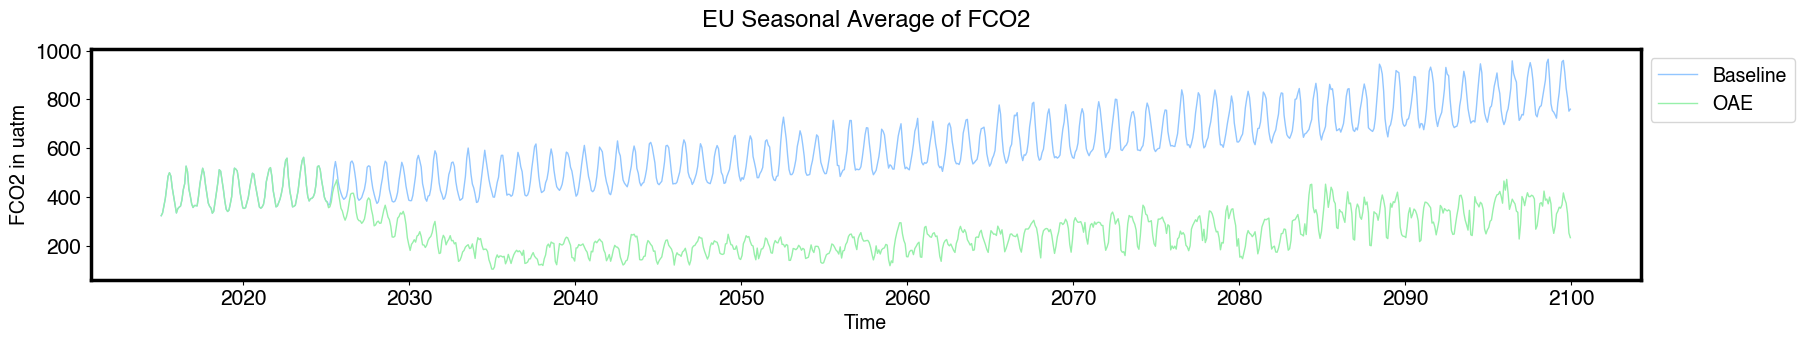

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.fco2, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.fco2, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of FCO2', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [14]:
sliced_frame_baseline_plot = sliced_frame_baseline.fco2.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.fco2.mean(dim=('y', 'x'))

In [15]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

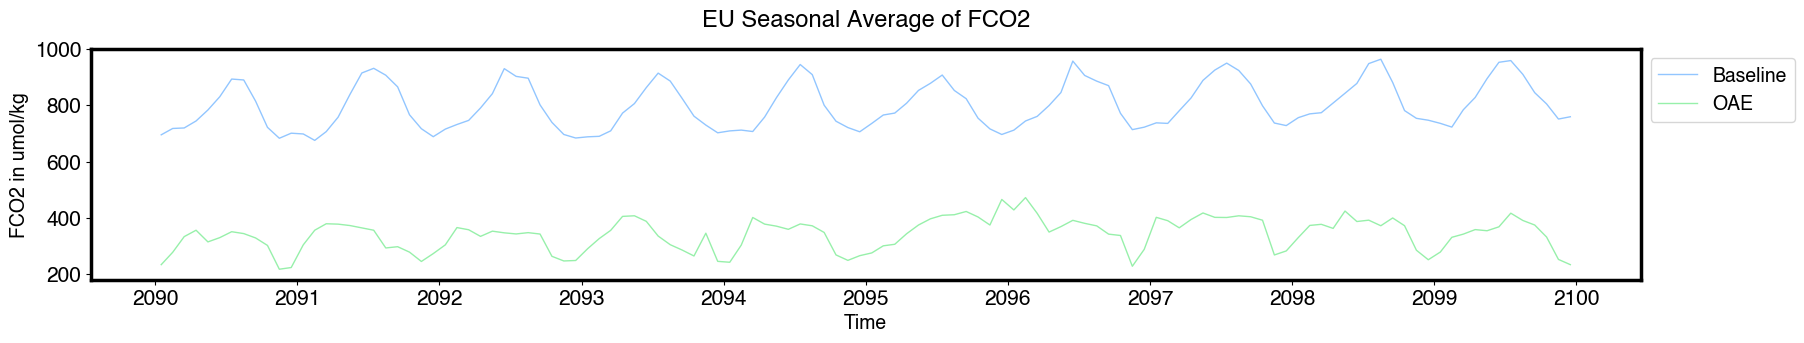

In [16]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.fco2, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.fco2, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of FCO2', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of FCO2

In [23]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_baseline = sliced_data_baseline["fco2"].sel(time_counter=slice(start_date, end_date))

In [24]:
fco2_season_summary_baseline = fco2_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_season_mean_all_years_baseline = fco2_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
fco2_seasonal_mean_baseline = fco2_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [25]:
start_date = "2090-01-01"
end_date = "2100-01-01"

fco2_oae = sliced_data_oae["fco2"].sel(time_counter=slice(start_date, end_date))

In [26]:
fco2_season_summary_oae = fco2_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_season_mean_all_years_oae = fco2_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
fco2_seasonal_mean_oae = fco2_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

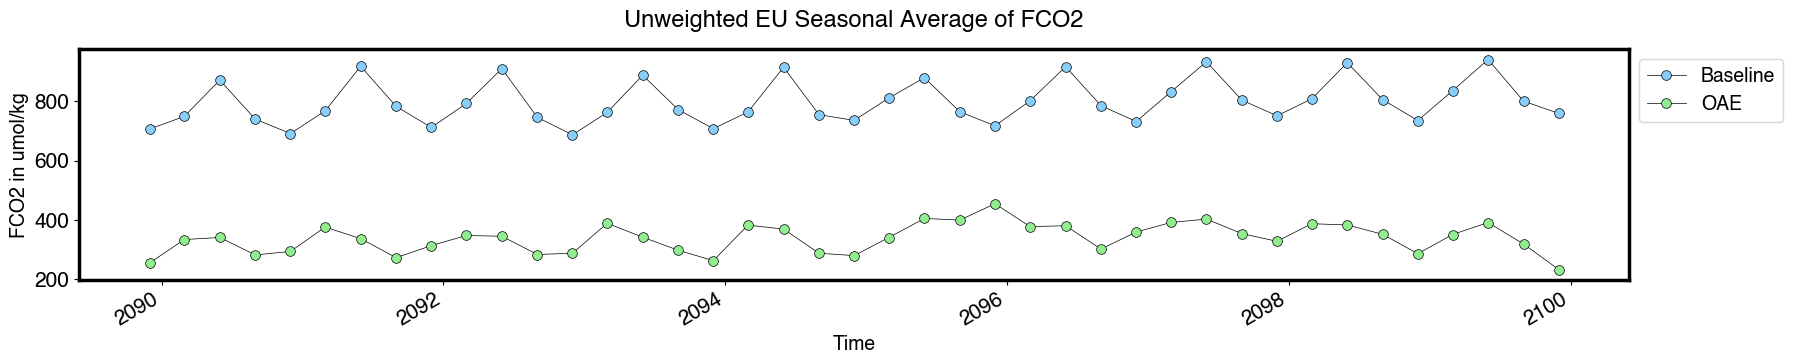

In [27]:
f, ax = plt.subplots(figsize=(20, 3))

fco2_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of FCO2

In [28]:
month_length_baseline = fco2_baseline.time_counter.dt.days_in_month
fco2_weighted_mean_baseline = ((fco2_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
fco2_weighted_mean_baseline = fco2_weighted_mean_baseline.where(fco2_weighted_mean_baseline)
fco2_weighted_season_baseline = fco2_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [29]:
month_length_oae = fco2_oae.time_counter.dt.days_in_month
fco2_weighted_mean_oae = ((fco2_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
fco2_weighted_mean_oae = fco2_weighted_mean_oae.where(fco2_weighted_mean_oae)
fco2_weighted_season_oae = fco2_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

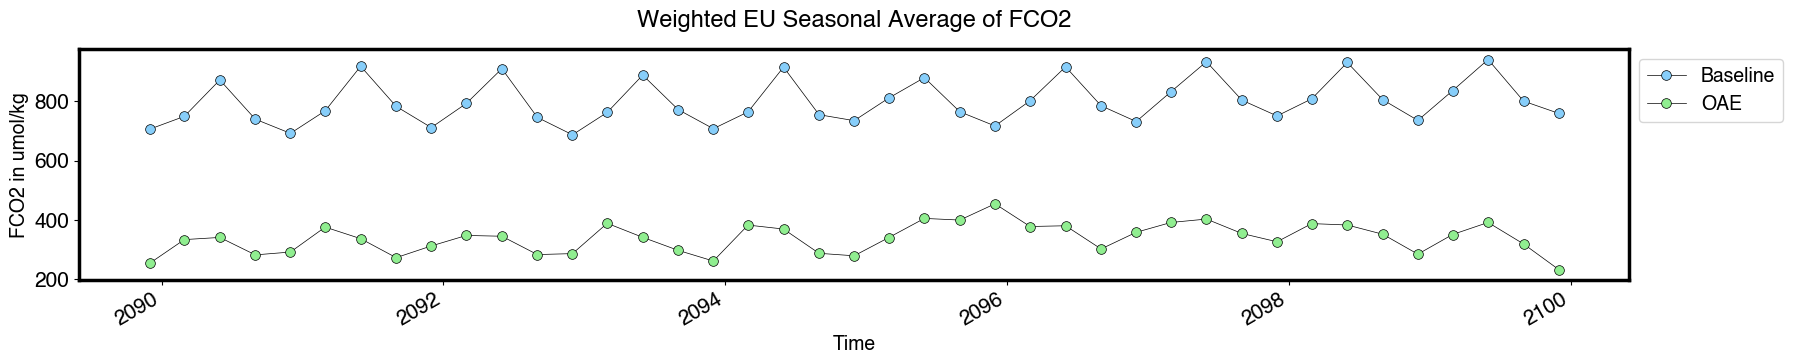

In [30]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
fco2_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of FCO2 (seasons displayed)

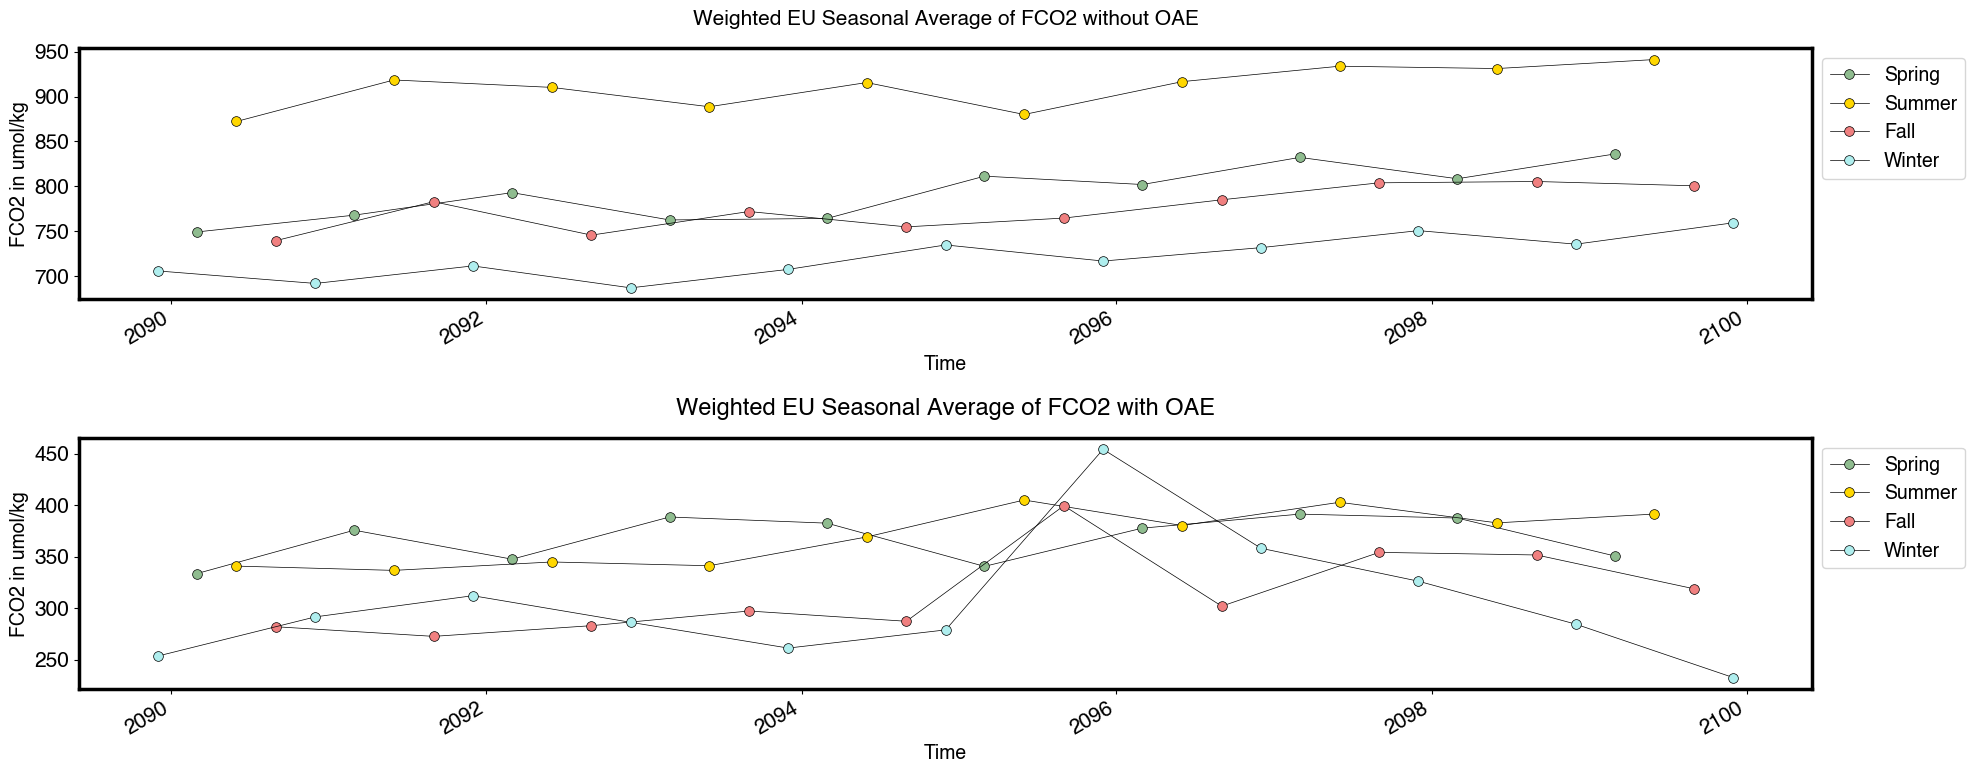

In [31]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in fco2_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of FCO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('FCO2 in uatm', fontsize=14)

for month, arr in fco2_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('FCO2 in uatm', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of FCO2 without OAE (seasons displayed)

In [32]:
fco2_weighted_baseline = fco2_weighted_season_baseline.to_dataframe('fco2')
fco2_weighted_baseline['Month'] = pd.DatetimeIndex(fco2_weighted_baseline.index).month

In [33]:
conditions = [
    (fco2_weighted_baseline['Month'] == 3),
    (fco2_weighted_baseline['Month'] == 6),
    (fco2_weighted_baseline['Month'] == 9),
    (fco2_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

fco2_weighted_baseline['Month'] = np.select(conditions, values)

In [35]:
colors = dict(zip(fco2_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

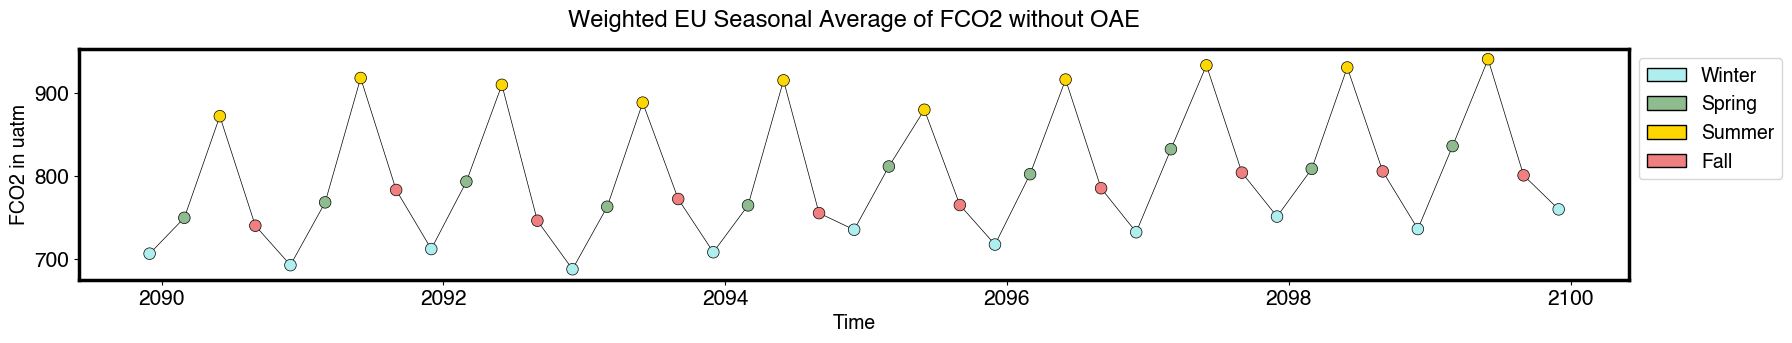

In [36]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, '-', color="black",  linewidth=0.5, markeredgewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, color=fco2_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of FCO2 with OAE (seasons displayed)

In [37]:
fco2_weighted_oae = fco2_weighted_season_oae.to_dataframe('fco2')
fco2_weighted_oae['Month'] = pd.DatetimeIndex(fco2_weighted_oae.index).month

In [38]:
conditions = [
    (fco2_weighted_oae['Month'] == 3),
    (fco2_weighted_oae['Month'] == 6),
    (fco2_weighted_oae['Month'] == 9),
    (fco2_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

fco2_weighted_oae['Month'] = np.select(conditions, values)

In [39]:
colors = dict(zip(fco2_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

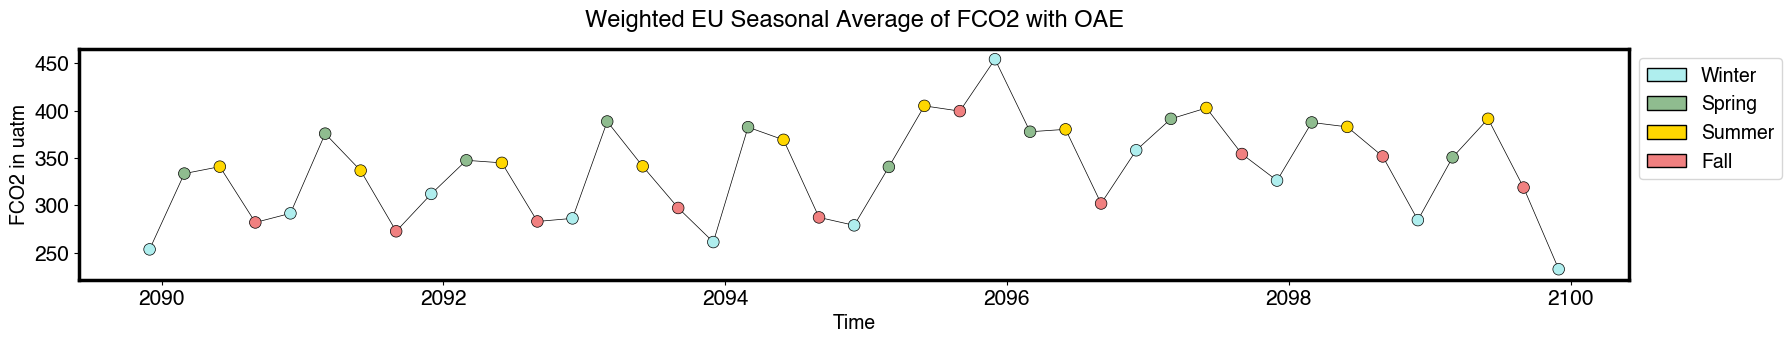

In [40]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_weighted_oae.index, fco2_weighted_oae.fco2, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_oae.index, fco2_weighted_oae.fco2, color=fco2_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of FCO2 (seasons displayed)

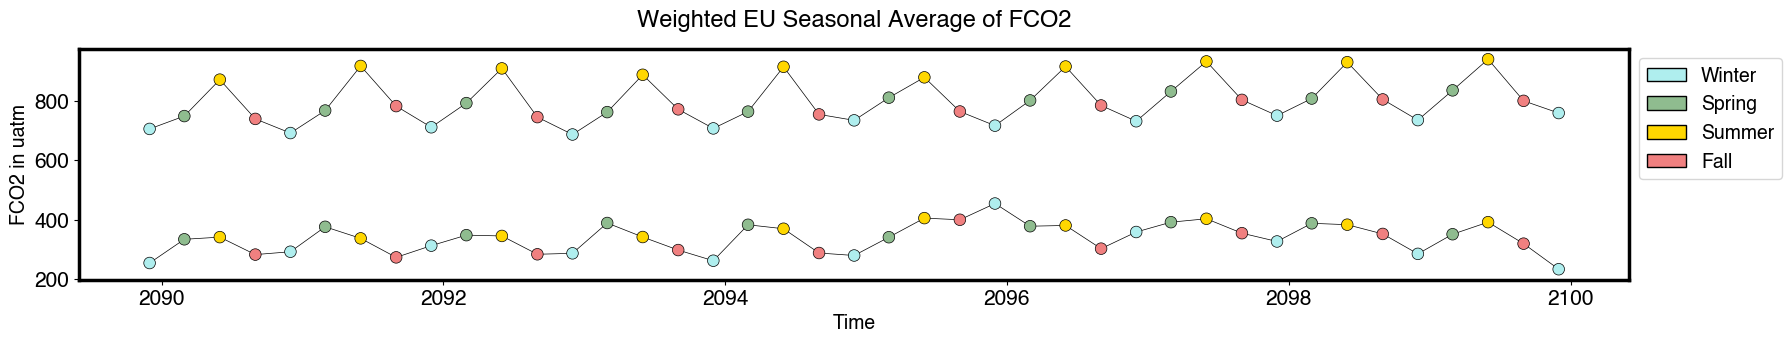

In [41]:
colors = dict(zip(fco2_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))
colors = dict(zip(fco2_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, '-', color="black",  linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_baseline.index, fco2_weighted_baseline.fco2, color=fco2_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(fco2_weighted_oae.index, fco2_weighted_oae.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_weighted_oae.index, fco2_weighted_oae.fco2, color=fco2_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of FCO2

In [42]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

fco2_baseline_month = sliced_data_baseline["fco2"].sel(time_counter=slice(start_date_month, end_date_month))

In [44]:
fco2_month_summary_baseline = fco2_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_month_mean_all_years_baseline = fco2_baseline_month.resample(time_counter='M').mean(keep_attrs=True)
fco2_monthly_mean_baseline = fco2_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [46]:
fco2_oae_month = sliced_data_oae["fco2"].sel(time_counter=slice(start_date_month, end_date_month))

In [47]:
fco2_month_summary_oae = fco2_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
fco2_month_mean_all_years_oae = fco2_oae_month.resample(time_counter='M').mean(keep_attrs=True)
fco2_monthly_mean_oae = fco2_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

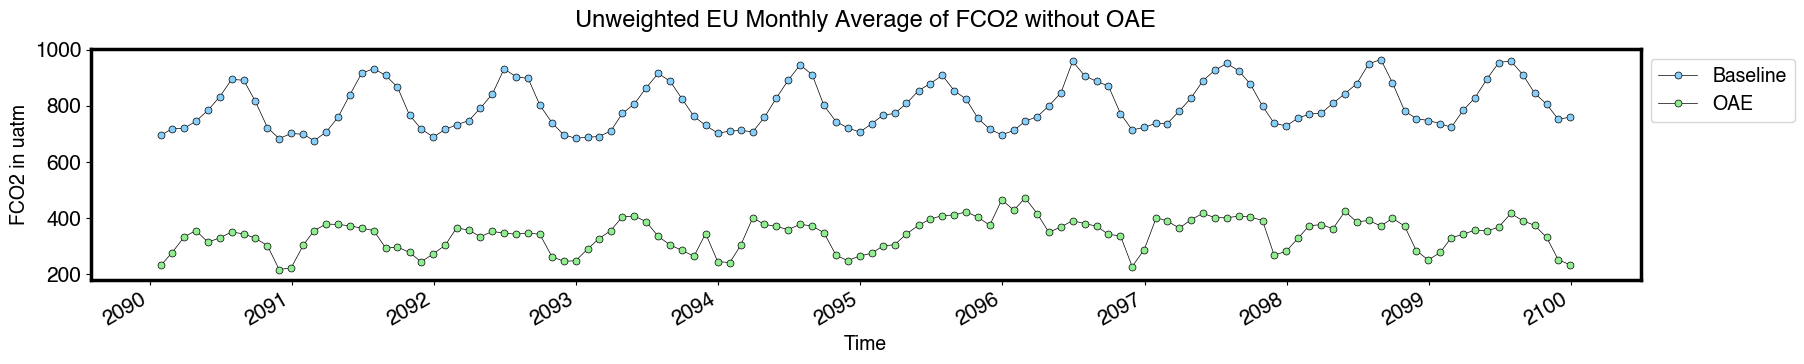

In [48]:
f, ax = plt.subplots(figsize=(20, 3))

fco2_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

fco2_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("FCO2 in uatm", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of FCO2 without OAE (months displayed)

In [49]:
fco2_baseline_monthly = fco2_monthly_mean_baseline.to_dataframe('fco2')
fco2_baseline_monthly['Month'] = pd.DatetimeIndex(fco2_baseline_monthly.index).month

In [50]:
conditions = [
    (fco2_baseline_monthly['Month'] == 1),
    (fco2_baseline_monthly['Month'] == 2),
    (fco2_baseline_monthly['Month'] == 3),
    (fco2_baseline_monthly['Month'] == 4),
    (fco2_baseline_monthly['Month'] == 5),
    (fco2_baseline_monthly['Month'] == 6),
    (fco2_baseline_monthly['Month'] == 7),
    (fco2_baseline_monthly['Month'] == 8),
    (fco2_baseline_monthly['Month'] == 9),
    (fco2_baseline_monthly['Month'] == 10),
    (fco2_baseline_monthly['Month'] == 11),
    (fco2_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_baseline_monthly['Month'] = np.select(conditions, values)

In [51]:
colors = dict(zip(fco2_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

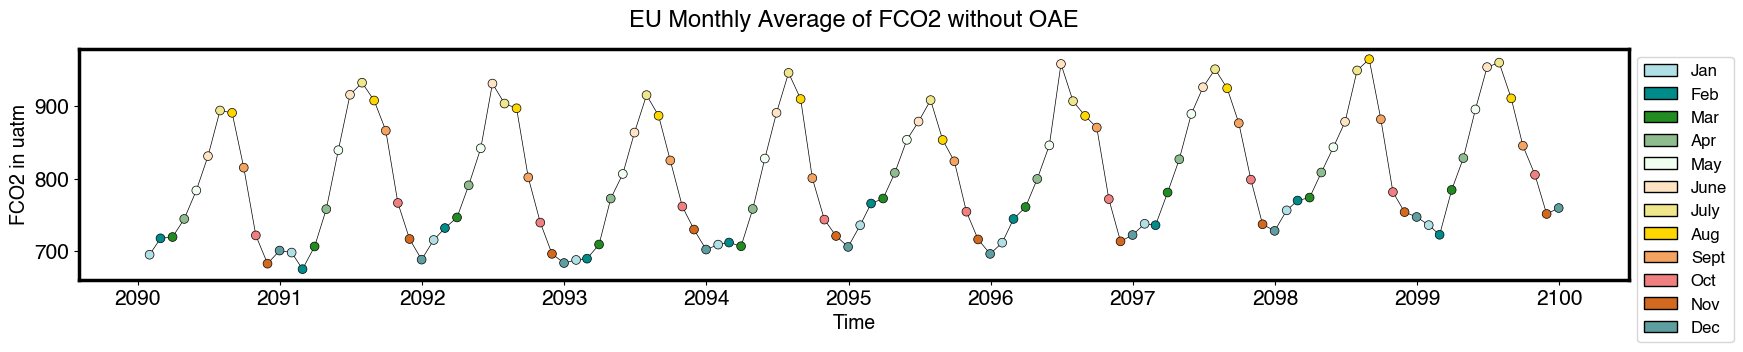

In [52]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, color=fco2_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("EU Monthly Average of FCO2 without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of FCO2 with OAE (months displayed)

In [53]:
fco2_oae_monthly = fco2_monthly_mean_oae.to_dataframe('fco2')
fco2_oae_monthly['Month'] = pd.DatetimeIndex(fco2_oae_monthly.index).month

In [54]:
conditions = [
    (fco2_oae_monthly['Month'] == 1),
    (fco2_oae_monthly['Month'] == 2),
    (fco2_oae_monthly['Month'] == 3),
    (fco2_oae_monthly['Month'] == 4),
    (fco2_oae_monthly['Month'] == 5),
    (fco2_oae_monthly['Month'] == 6),
    (fco2_oae_monthly['Month'] == 7),
    (fco2_oae_monthly['Month'] == 8),
    (fco2_oae_monthly['Month'] == 9),
    (fco2_oae_monthly['Month'] == 10),
    (fco2_oae_monthly['Month'] == 11),
    (fco2_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fco2_oae_monthly['Month'] = np.select(conditions, values)

In [55]:
colors = dict(zip(fco2_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

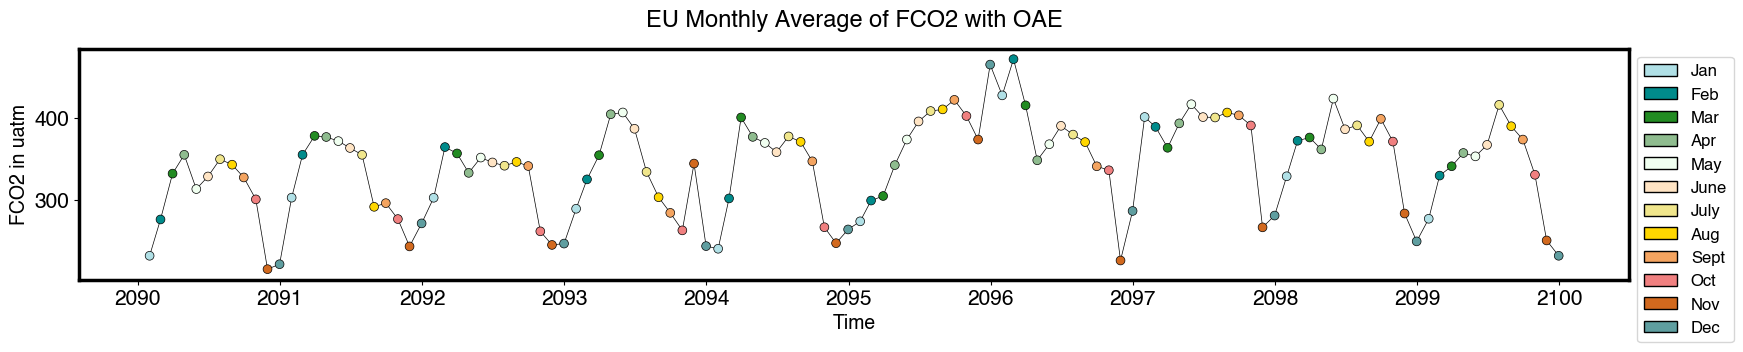

In [56]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(fco2_oae_monthly.index, fco2_oae_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_oae_monthly.index, fco2_oae_monthly.fco2, color=fco2_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("EU Monthly Average of FCO2 with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of FCO2 (months displayed)

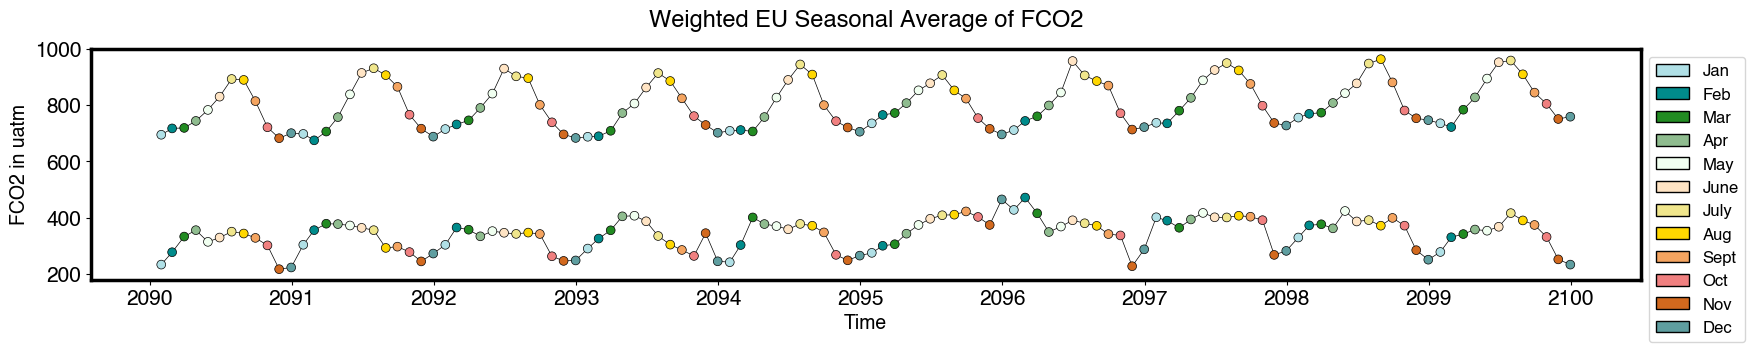

In [57]:
colors = dict(zip(fco2_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, color=fco2_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(fco2_oae_monthly.index, fco2_oae_monthly.fco2, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(fco2_oae_monthly.index, fco2_oae_monthly.fco2, color=fco2_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('FCO2 in uatm', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of FCO2", fontsize=17, y=1.06)

pass

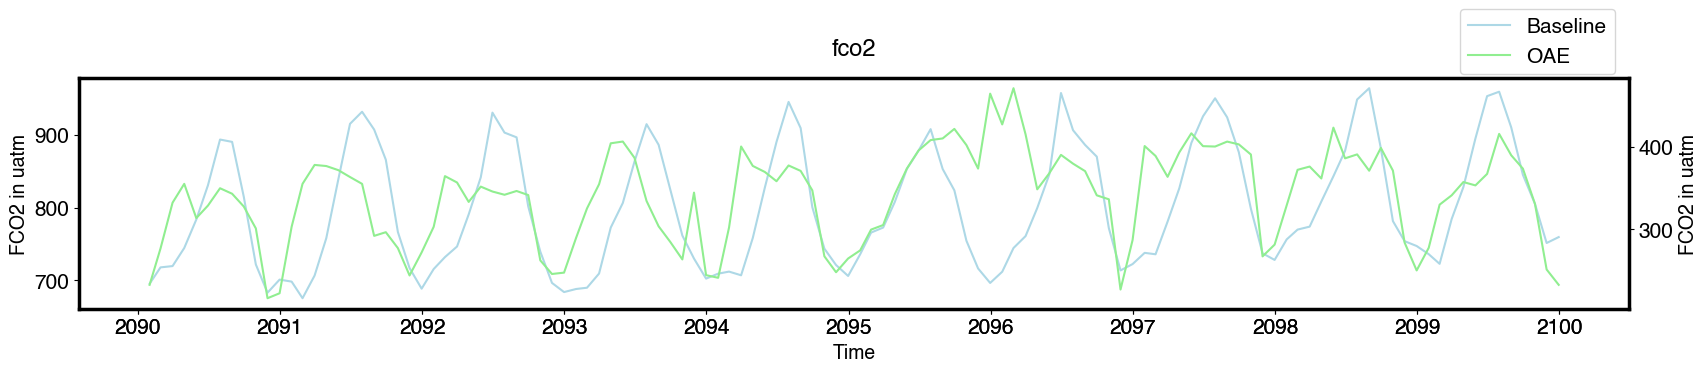

In [58]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(fco2_baseline_monthly.index, fco2_baseline_monthly.fco2, linewidth=1.5, color="lightblue", label = 'Baseline', zorder=1)
ax.set_ylabel('FCO2 in uatm', fontsize=14)

ax2.plot(fco2_oae_monthly.index, fco2_oae_monthly.fco2, linewidth=1.5, color="lightgreen", label = 'OAE', zorder=1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('FCO2 in uatm', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('FCO2', fontname="Helvetica", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()